In [12]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd
import platform
import matplotlib.pyplot as plt
import altair as alt

## Downloading the data 

In [13]:
# Adapted from lecture notes
# Necessary metadata
article_id = 14096681  # unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "data/"

In [14]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # contains all the data
files = data["files"]             # the data about the files
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [15]:
%%time
files_to_dl = ["data.zip"] 
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 4.58 s, sys: 3.08 s, total: 7.66 s
Wall time: 38.4 s


In [16]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 14.5 s, sys: 1.09 s, total: 15.6 s
Wall time: 15.7 s


## Combining data CSVs

In [17]:
files = glob.glob('data/*.csv')
files.remove('data/observed_daily_rainfall_SYD.csv') # Use '/' for mac, '\' for windows

In [18]:
# in case you already ran the chunks and want to retest -- DELETE FOR SUBMISSION

# files.remove('data\combined_data.csv')  # Use '/' for mac, '\' for windows

In [19]:
files

['data/MPI-ESM-1-2-HAM_daily_rainfall_NSW.csv',
 'data/AWI-ESM-1-1-LR_daily_rainfall_NSW.csv',
 'data/NorESM2-LM_daily_rainfall_NSW.csv',
 'data/ACCESS-CM2_daily_rainfall_NSW.csv',
 'data/FGOALS-f3-L_daily_rainfall_NSW.csv',
 'data/CMCC-CM2-HR4_daily_rainfall_NSW.csv',
 'data/MRI-ESM2-0_daily_rainfall_NSW.csv',
 'data/GFDL-CM4_daily_rainfall_NSW.csv',
 'data/BCC-CSM2-MR_daily_rainfall_NSW.csv',
 'data/EC-Earth3-Veg-LR_daily_rainfall_NSW.csv',
 'data/CMCC-ESM2_daily_rainfall_NSW.csv',
 'data/NESM3_daily_rainfall_NSW.csv',
 'data/MPI-ESM1-2-LR_daily_rainfall_NSW.csv',
 'data/ACCESS-ESM1-5_daily_rainfall_NSW.csv',
 'data/FGOALS-g3_daily_rainfall_NSW.csv',
 'data/INM-CM4-8_daily_rainfall_NSW.csv',
 'data/MPI-ESM1-2-HR_daily_rainfall_NSW.csv',
 'data/TaiESM1_daily_rainfall_NSW.csv',
 'data/NorESM2-MM_daily_rainfall_NSW.csv',
 'data/CMCC-CM2-SR5_daily_rainfall_NSW.csv',
 'data/KIOST-ESM_daily_rainfall_NSW.csv',
 'data/INM-CM5-0_daily_rainfall_NSW.csv',
 'data/MIROC6_daily_rainfall_NSW.csv',


In [20]:
def combine_csv(regex_string, files):
    """
    Combines csv with given files and assigns name according to regex expression.  
    Parameters
    ----------
    regex_string : string
                   regex expression to extract model name  
    files   : list
            list of strings to the path of the file
                
    Returns
    -------
    df : pandas dataframe 
    """
    df = pd.concat((pd.read_csv(file, index_col=0)
                    .assign(model=re.findall(regex_string, file)[0])
                    for file in files))
    return df

In [21]:
%%time

# Set regex for different operating system

string_mac = r"(?<=data/)(.*)(?=_daily)" 
string_windows = r"(?<=data\\)(.*)(?=_daily)"

if 'mac' in platform.platform():
    df = combine_csv(string_mac, files)
else:
    df = combine_csv(string_windows, files)
    
df.to_csv("data/combined_data.csv")

CPU times: user 5min 49s, sys: 8.85 s, total: 5min 58s
Wall time: 6min


In [22]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |     10min 39s       |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |     6min 5s       |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |     8min23s   |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |   8min 46s   |

## Loading the combined CSV to memory and performing a simple EDA

In [23]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [24]:
data = pd.read_csv("data/combined_data.csv", parse_dates=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62467843 entries, 0 to 62467842
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   lat_min        float64
 2   lat_max        float64
 3   lon_min        float64
 4   lon_max        float64
 5   rain (mm/day)  float64
 6   model          object 
dtypes: float64(5), object(2)
memory usage: 3.3+ GB


In [25]:
%%time
data = data.astype({"time": 'datetime64[ns]',
             'lat_min': 'float32',
             'lat_max': 'float32',
             'lon_min': 'float32',
             'lon_max': 'float32',
             'rain (mm/day)': 'float32'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62467843 entries, 0 to 62467842
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   time           datetime64[ns]
 1   lat_min        float32       
 2   lat_max        float32       
 3   lon_min        float32       
 4   lon_max        float32       
 5   rain (mm/day)  float32       
 6   model          object        
dtypes: datetime64[ns](1), float32(5), object(1)
memory usage: 2.1+ GB
CPU times: user 8.96 s, sys: 1.94 s, total: 10.9 s
Wall time: 11.3 s


**After converting the datatypes of numeric columns, the memory usage gets reduced to 2.1GB.**

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |     55.6 s     |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |     11.4 s     |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |        |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

In [ ]:
# data_smp = data.sample(2000)
# data_smp.info()

### Line plots of overall rainfall over time

In [26]:
data.describe()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day)
count,5.924854e+07,6.246784e+07,5.924854e+07,6.246784e+07,5.924854e+07
mean,-3.310497e+01,-3.197765e+01,1.469057e+02,1.482150e+02,1.901173e+00
std,1.963549e+00,1.992067e+00,3.793784e+00,3.809994e+00,5.585735e+00
min,-3.646739e+01,-3.600000e+01,1.406250e+02,1.412500e+02,-3.807373e-12
25%,-3.486911e+01,-3.366221e+01,1.434375e+02,1.450000e+02,3.838413e-06
50%,-3.300000e+01,-3.204189e+01,1.468750e+02,1.481250e+02,6.154947e-02
75%,-3.140170e+01,-3.015707e+01,1.501875e+02,1.513125e+02,1.020918e+00
max,-2.990000e+01,-2.790606e+01,1.537500e+02,1.556250e+02,4.329395e+02


| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |       |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |            |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

In [ ]:
%%time
# Using Altair

alt.Chart(data).mark_line().encode(  
    x="time",
    y='rain (mm/day)',
).properties(
    width=400,
    height=200
)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |        |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |            |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

### Line plots of rainfall over time by model

In [ ]:
%%time

# alt.Chart(data_smp).mark_line().encode(
alt.Chart(data).mark_line().encode( 
    x="time",
    y='rain (mm/day)',
).properties(
    width=250,
    height=150
).facet(
    "model",
    columns=3
) 

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |      |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |            |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

### Histogram of rainfall by lat_min, lat_max, lon_min, lon_max

In [ ]:
def plot_rain(xcol):
    # plot = alt.Chart(data_smp).mark_bar().encode(
    plot = alt.Chart(data).mark_bar().encode(
        x=xcol,
        y='rain (mm/day)',
    ).properties(
        width=400,
        height=200
    )
    return plot
    

In [ ]:
(plot_rain("lat_min") | plot_rain("lat_max")) & (plot_rain("lon_min") | plot_rain("lon_max"))

### Correlation matrices

In [ ]:
# data_smp_filtered = data_smp[data_smp["model"] != "GFDL-ESM4"]

In [ ]:
%%time
data.corr().style.background_gradient(cmap='Blues')

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |     |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |            |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

Check linearity between `lat_min`, `lat_max`:

In [ ]:
%%time
alt.Chart(data).mark_line().encode(
# alt.Chart(data_smp).mark_line().encode(
    x="lat_min",
    y='lat_max',
).properties(
    width=400,
    height=200
)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |      |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |            |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

Check linearity between `lon_min`, `lon_max`:

In [ ]:
%%time
alt.Chart(data_smp).mark_line().encode(
    x="lon_min",
    y='lon_max'
).properties(
    width=400,
    height=200
)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |        |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |            |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

Remove columns `lat_min` and `lon_min` as they show strong linearity with `lat_max` and `lon_max` and **reduce memory usage to 1.6GB**.

In [ ]:
# data_smp_filtered = data_smp.drop(columns=['lat_min', 'lon_min']) # Filter sampled data
data_filtered = data.drop(columns=['lat_min', 'lon_min'])  # Filter original data

In [ ]:
%%time
data_filtered.info() # Memory usage reduced to 1.6GB

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |     156 ms      |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |     24.5 ms       |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |       |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |     |

### Geographical distribution of rainfall

In [ ]:
%%time

alt.Chart(data_filtered).mark_point().encode(         
    alt.X('lat_max', title = "Latitude", scale=alt.Scale(zero=False)),              
    alt.Y('lon_max', title = "Longitude", scale=alt.Scale(zero=False)),          
    size = alt.Size('rain (mm/day)')                                               
) 

## Perform a simple EDA in R

In [27]:
import pyarrow.dataset as ds
import pyarrow as pa
import pandas as pd
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra

##### The baseline to transfer the dataframe from python to R by Pandas exchange：

In [28]:
# Load the cell magic
%load_ext rpy2.ipython

##### It is oversized to read by pandas, so we choose to minimize the data set to 10,000,00 rows:

In [29]:
df_combined = pd.read_csv("data/combined_data.csv", nrows=10000000)

In [30]:
%%time
%%R -i df_combined
start_time <- Sys.time()
suppressMessages(library(dplyr))
result <- df_combined %>% count(model)
print(result)
end_time <- Sys.time()
print(end_time - start_time)

            model       n
1      ACCESS-CM2 1932840
2  AWI-ESM-1-1-LR  966420
3    CMCC-CM2-HR4 1995220
4     FGOALS-f3-L 3219300
5 MPI-ESM-1-2-HAM  966420
6      NorESM2-LM  919800
Time difference of 0.701124 secs
CPU times: user 4min 15s, sys: 5.25 s, total: 4min 21s
Wall time: 4min 23s


##### The baseline to transfer the dataframe from python to R by Pandas exchange：

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |    57.1 s        |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |    4 min 27s        |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |     2min 4s   |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |      |

##### Next we will transfer the dataframe by Arrow exchange:

In [31]:
%%time
# Adapted from lecture notes
dataset = ds.dataset("data/combined_data.csv", format="csv")
table = dataset.to_table()
r_table = pyra.converter.py2rpy(table)

CPU times: user 33.4 s, sys: 3.37 s, total: 36.8 s
Wall time: 36 s


In [32]:
%%time
%%R -i r_table
start_time <- Sys.time()
suppressMessages(library(dplyr))
result <- r_table %>% summary()
end_time <- Sys.time()
print(result)
print(end_time - start_time)

              Length   Class        Mode       
time          62467843 ChunkedArray environment
lat_min       62467843 ChunkedArray environment
lat_max       62467843 ChunkedArray environment
lon_min       62467843 ChunkedArray environment
lon_max       62467843 ChunkedArray environment
rain (mm/day) 62467843 ChunkedArray environment
model         62467843 ChunkedArray environment
Time difference of 0.003658056 secs
CPU times: user 19.1 ms, sys: 7.83 ms, total: 26.9 ms
Wall time: 58.5 ms


##### The approac to transfer the dataframe from python to R by Arrow exchange：

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Qingqing   |   Windows               |   16GB  |     Intel(R) Core(TM) i7-6700HQ CPU @ 2.60GHz 2.59 GHz      |   T     |        77 ms    |
| Lianna   |       MacOS           |  16GB   |    Apple M1 - 8 Core       |    T    |    20.9 ms        |
| Linhan    |   Windows              |   16GB  |    AMD Ryzen7 4800h       |    T    |   1.17s     |
|  Doris    |      MacOS       |   16GB  |   1.4 GHz Quad-Core Intel Core i5    |    T    |      |

### Reason of choosing Arrow exchange approach over others:
- We chose Arrow exchange to convert pandas data frame to R data frame. 
    - Apache Arrow greatly improved performances when moving data between Python and R compared to purely Pandas exchange (from 4-7 minutes to seconds). Clearly, from the comparison above, using Arrow exchange proved to be much faster and more efficient than Panda exchange.
    - Compared to the Parquet file and the Feather file, in addition to the good performance, Arrow Exchange doesn't need to save extra files, since we already have CSV file in our case, we thought it would be better if we can skip this step and save storage. And Feather is still in the developmental stage and Parquet format, for the most part is used for archival storage purposes.
    - Arrow is well integrated into the dplyr, and many dplyr verbs are supported, so it is very convenient to use Arrow Exchange here. Using pandas exchange may use more time since most of the time is spent on serialization and deserialization process, though what we do inside R may take less time. And with arrow table, we have zero-copy reads and minimum serialization, which makes time spent on the process less.
    - Arrow is robust, fast, and is well operated on independent machines, thus we believe it is the best choice for milestone one completion.
    
### EDA

In [33]:
%reload_ext rpy2.ipython

In [34]:
%%R -i r_table
library(dplyr)
head(r_table)

Table
6 rows x 7 columns
$time <timestamp[s]>
$lat_min <double>
$lat_max <double>
$lon_min <double>
$lon_max <double>
$rain (mm/day) <double>
$model <string>


In [35]:
%%R -i r_table
r_table|>count(model)|>collect()|>print(n = Inf)
summary(r_table)

# A tibble: 27 × 2
   model                  n
   <chr>              <int>
 1 MPI-ESM-1-2-HAM   966420
 2 AWI-ESM-1-1-LR    966420
 3 NorESM2-LM        919800
 4 ACCESS-CM2       1932840
 5 FGOALS-f3-L      3219300
 6 CMCC-CM2-HR4     3541230
 7 MRI-ESM2-0       3037320
 8 GFDL-CM4         3219300
 9 BCC-CSM2-MR      3035340
10 EC-Earth3-Veg-LR 3037320
11 CMCC-ESM2        3541230
12 NESM3             966420
13 MPI-ESM1-2-LR     966420
14 ACCESS-ESM1-5    1610700
15 FGOALS-g3        1287720
16 INM-CM4-8        1609650
17 MPI-ESM1-2-HR    5154240
18 TaiESM1          3541230
19 NorESM2-MM       3541230
20 CMCC-CM2-SR5     3541230
21 KIOST-ESM        1287720
22 INM-CM5-0        1609650
23 MIROC6           2070900
24 BCC-ESM1          551880
25 GFDL-ESM4        3219300
26 CanESM5           551880
27 SAM0-UNICON      3541153
              Length   Class        Mode       
time          62467843 ChunkedArray environment
lat_min       62467843 ChunkedArray environment
lat_max       62467843 Ch

R[write to console]: Warning:
R[write to console]:  window functions not currently supported in Arrow; pulling data into R



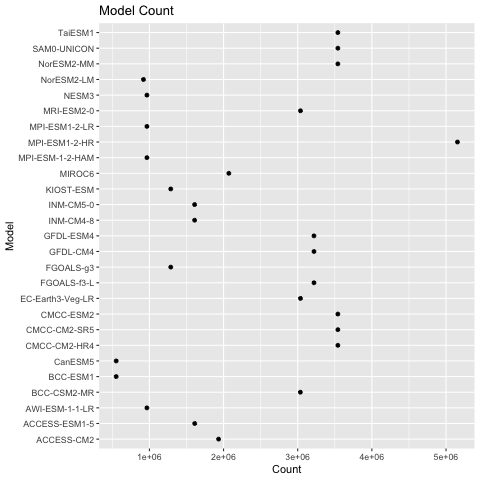

In [50]:
%%R -i r_table 
library(ggplot2)

result <- r_table %>% 
    add_count(model) %>%
    ggplot(aes(y = model)) +
        geom_point(stat = 'count') +
        labs(y = 'Model', x = 'Count') +
        ggtitle('Model Count')
print(result)